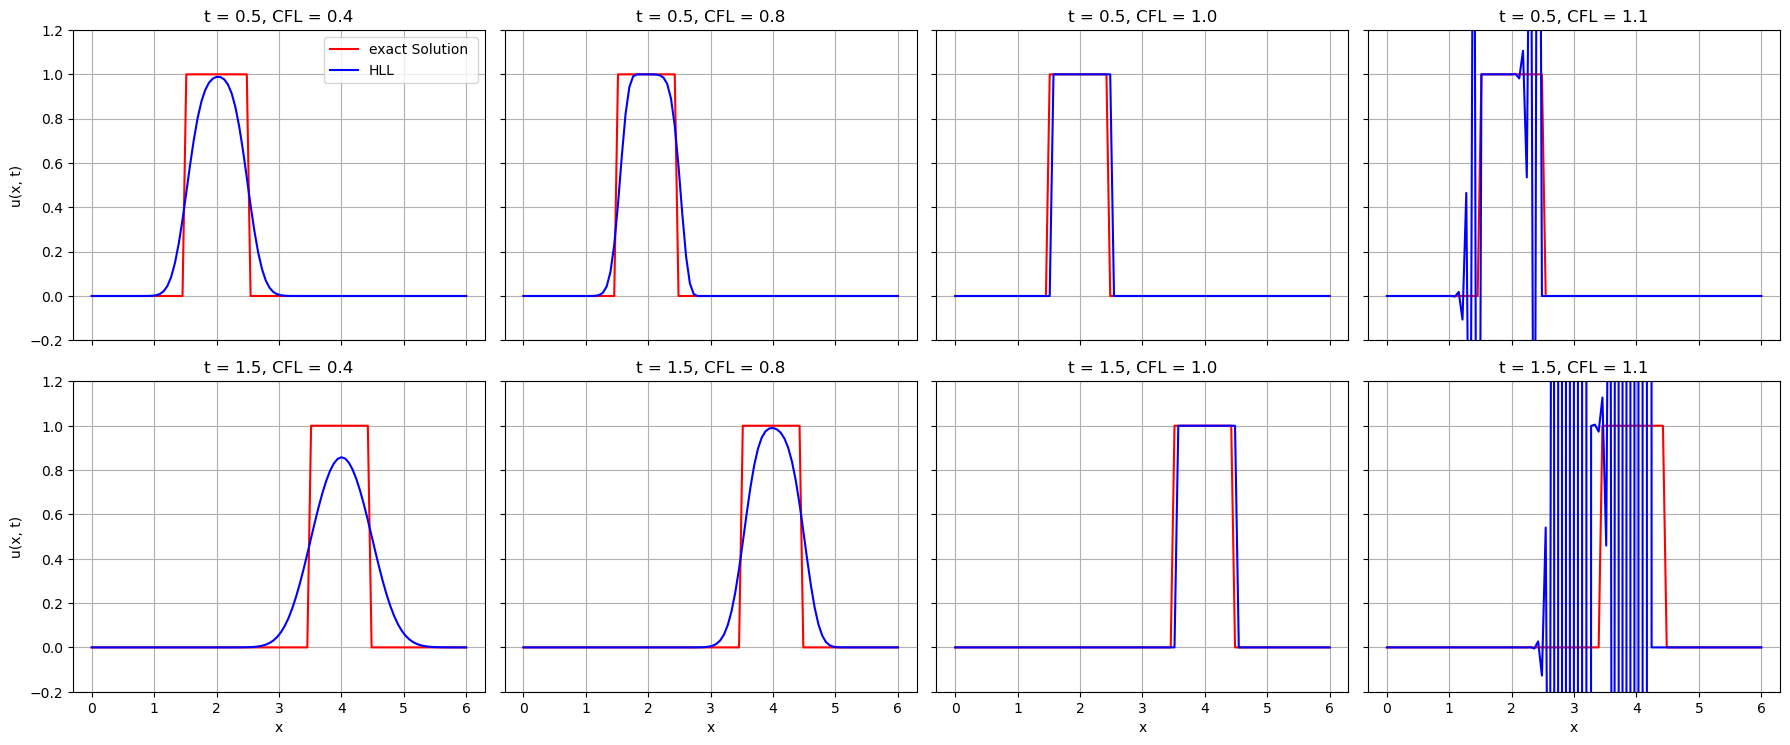

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_convection(CFL, Tfinal):
    # Définition du domaine
    a = 0
    b = 6
    # Nombre de nœuds
    N = 100
    # Taille du maillage
    dx = (b - a) / (N - 1)
    # Vitesse de transport
    c = 2
    x = np.linspace(a, b, N)

    # Fonction de condition initiale
    def g(x):
        x = x % b
        return 1 if 1/2 <= x <= 3/2 else 0

    # Initialisation de la condition initiale
    u = np.array([g(xi) for xi in x])

    # Calcul du pas de temps pour assurer la stabilité
    dt = CFL * dx / abs(c)
    lamda = dt / dx

    unewp = np.zeros(N)
    unewx = np.zeros(N)

    temps = 0

    while temps < Tfinal:
        # Calcul de la solution exacte au temps courant
        for i in range(N):
            unewx[i] = g(x[i] - c * temps)
        
        # Mise à jour de la solution numérique
        for i in range(1, N-1):
            flux_left = max(0, c) * u[i-1] + min(c, 0) * u[i]
            flux_right = max(0, c) * u[i] + min(c, 0) * u[i+1]
            unewp[i] = u[i] - lamda * (flux_right - flux_left)
        
        # Conditions aux limites de Neumann (Dérivées nulles)
        unewp[0] = u[-1]
        unewp[-1] = unewp[-2]
        
        temps += dt
        u = unewp.copy()
        ux = unewx.copy()

    return x, u, ux

# Définition des valeurs pour CFL et Tfinal
CFLs = [0.4, 0.8, 1.0, 1.1]
Tfinals = [0.5, 1.5]

# Création de la figure et des sous-graphes
fig, axs = plt.subplots(len(Tfinals), len(CFLs), figsize=(18, 8), sharex=True, sharey=True)

# Boucle sur chaque combinaison de Tfinal et CFL
for ti, Tfinal in enumerate(Tfinals):
    for tj, CFL in enumerate(CFLs):
        x, u, ux = simulate_convection(CFL, Tfinal)
        ax = axs[ti, tj]
        ax.plot(x, ux, '-r', label='exact Solution ')
        ax.plot(x, u, '-b', label='HLL')
        ax.set_title(f"t = {Tfinal}, CFL = {CFL}")
        ax.set_ylim(-0.2, 1.2)  # Ajuster les limites de l'axe y
        ax.grid()
        if ti == len(Tfinals) - 1:  # Ajouter les étiquettes x seulement sur la dernière ligne
            ax.set_xlabel('x')
        if tj == 0:  # Ajouter les étiquettes y seulement sur la première colonne
            ax.set_ylabel('u(x, t)')
        if ti == 0 and tj == 0:  # Ajouter une légende seulement au premier sous-graphe
            ax.legend()

# Ajouter un titre global et ajuster l'affichage
#fig.suptitle("Simulation d'un problème de convection 1D par Volumes Finis")
plt.savefig('HLL_transport_ordre1_FIN.png')
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Ajuster le haut pour le titre global
plt.show()


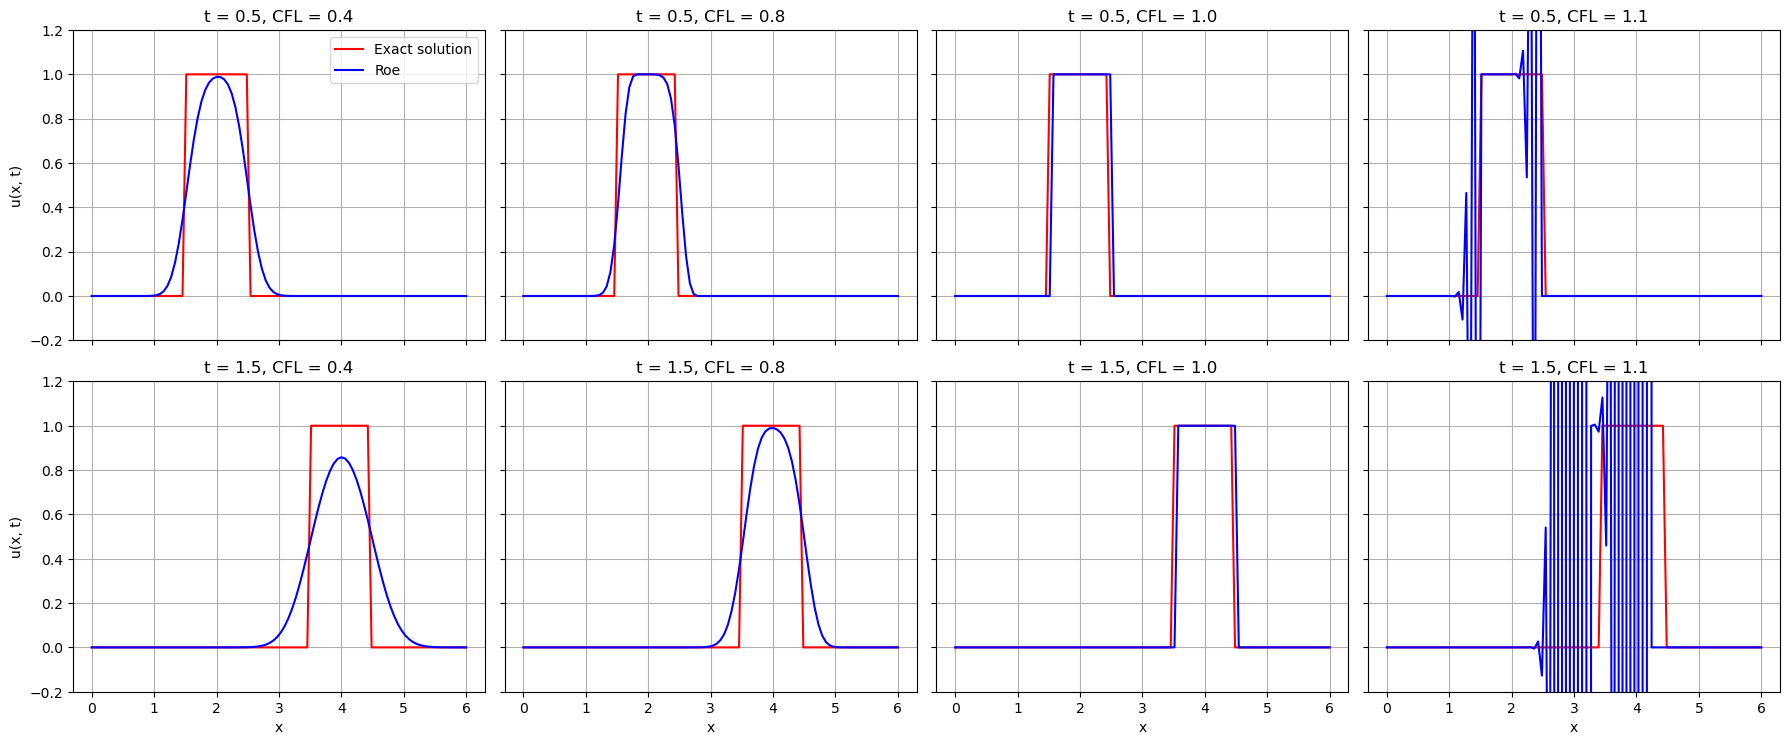

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_convection(CFL, Tfinal):
    # Définition du domaine
    a = 0
    b = 6
    # Nombre de nœuds
    N = 100
    # Taille du maillage
    dx = (b - a) / (N - 1)
    # Vitesse de transport
    c = 2
    x = np.linspace(a, b, N)

    # Fonction de condition initiale
    def g(x):
        x = x % b
        return 1 if 1/2 <= x <= 3/2 else 0

    # Initialisation de la condition initiale
    u = np.array([g(xi) for xi in x])

    # Calcul du pas de temps pour assurer la stabilité
    dt = CFL * dx / abs(c)
    lamda = dt / dx

    unewp = np.zeros(N)
    unewx = np.zeros(N)

    temps = 0

    while temps < Tfinal:
        # Calcul de la solution exacte au temps courant
        for i in range(N):
            unewx[i] = g(x[i] - c * temps)
        
        # Mise à jour de la solution numérique
        for i in range(1, N-1):
            flux_left = (c/2)*(u[i-1]+u[i])-1/2*abs(c)*(u[i]-u[i-1])
            flux_right=(c/2)*(u[i]+u[i+1])-1/2*abs(c)*(u[i+1]-u[i])
            unewp[i] = u[i] - lamda * (flux_right - flux_left)
        
        # Conditions aux limites de Neumann (Dérivées nulles)
        unewp[0] = u[-1]
        unewp[-1] = unewp[-2]
        
        temps += dt
        u = unewp.copy()
        ux = unewx.copy()

    return x, u, ux

# Définition des valeurs pour CFL et Tfinal
CFLs = [0.4, 0.8, 1.0, 1.1]
Tfinals = [0.5, 1.5]

# Création de la figure et des sous-graphes
fig, axs = plt.subplots(len(Tfinals), len(CFLs), figsize=(18, 8), sharex=True, sharey=True)

# Boucle sur chaque combinaison de Tfinal et CFL
for ti, Tfinal in enumerate(Tfinals):
    for tj, CFL in enumerate(CFLs):
        x, u, ux = simulate_convection(CFL, Tfinal)
        ax = axs[ti, tj]
        ax.plot(x, ux, '-r', label='Exact solution')
        ax.plot(x, u, '-b', label='Roe')
        ax.set_title(f"t = {Tfinal}, CFL = {CFL}")
        ax.set_ylim(-0.2, 1.2)  # Ajuster les limites de l'axe y
        ax.grid()
        if ti == len(Tfinals) - 1:  # Ajouter les étiquettes x seulement sur la dernière ligne
            ax.set_xlabel('x')
        if tj == 0:  # Ajouter les étiquettes y seulement sur la première colonne
            ax.set_ylabel('u(x, t)')
        if ti == 0 and tj == 0:  # Ajouter une légende seulement au premier sous-graphe
            ax.legend()

# Ajouter un titre global et ajuster l'affichage
#fig.suptitle("Simulation d'un problème de convection 1D par Volumes Finis")
plt.savefig('Roe_transport_ordre1_fin.png')
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Ajuster le haut pour le titre global
plt.show()

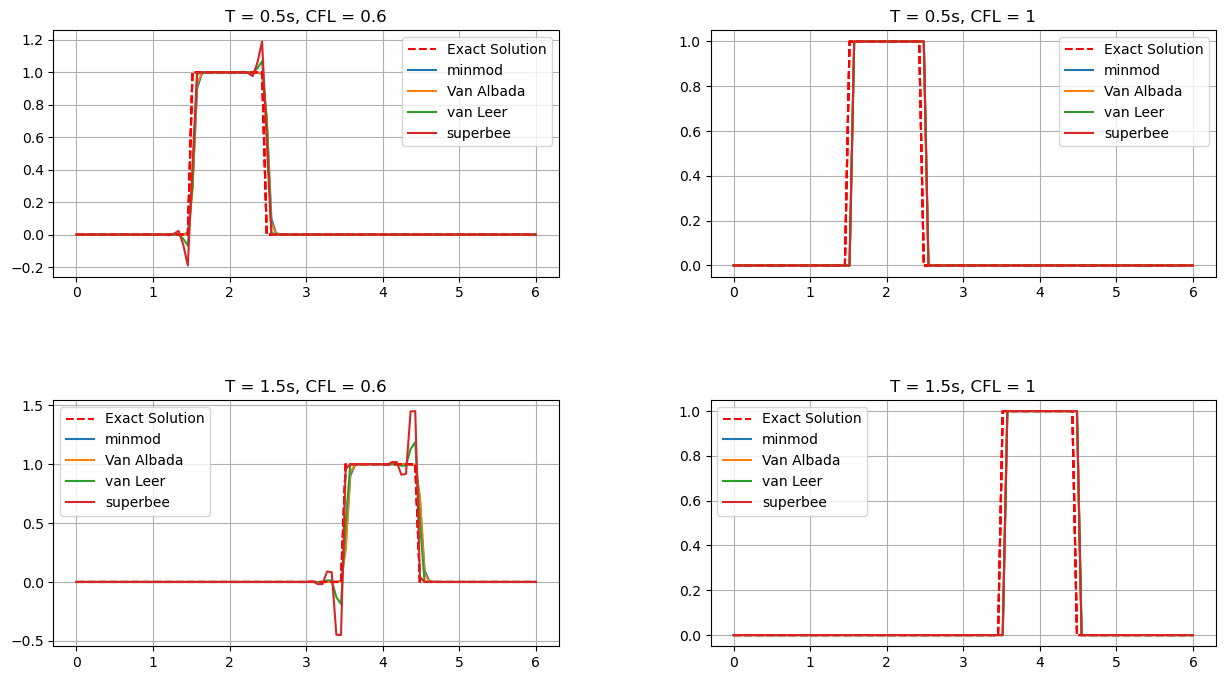

In [14]:
#HLL 

import numpy as np
import matplotlib.pyplot as plt

# Longueur du domaine
a = 0
b = 6
# Nombre de noeuds
N = 100
# Le pas du maillage
dx = (b - a) / (N - 1)
c=2
# Coordonnées x des noeuds
x = np.linspace(a, b, N)

# Combinaisons de CFL et Tfinal
CFL_values = [0.6, 1]
Tfinal_values = [0.5, 1.5]

# Limiteurs de pente
limiter_functions = {
    "minmod": lambda x: max(0, min(1, x)),
    "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),
    "van Leer": lambda x: (x + abs(x)) / (1 + abs(x)),
    "superbee": lambda x: max(0, min(2 * x, 1), min(x, 2))
}

# Fonction pour la condition initiale
# Fonction pour la condition initiale
def g(x):
    x = x % b
    if 1/2 <= x <= 3/2:
        return 1
    else:
        return 0
# Fonction de mise à jour des solutions numériques et exactes
def update_solutions(CFL, Tfinal, phm):
    u = np.zeros(N)
    for i in range(N):
        u[i] = g(x[i])

    unewp = np.zeros(N)
    unewx = np.zeros(N)
    temps = 0
    dt = CFL * dx / abs(c)
    lamda = dt / dx

    while temps < Tfinal:
      

        for i in range(N):
            unewx[i] = g(x[i] - c * temps)

        r = np.zeros(N)
        for i in range(1, N - 1):
            if (u[i + 1] - u[i]) != 0:
                r[i] = (u[i] - u[i - 1]) / (u[i + 1] - u[i])
            else:
                r[i] = 0

            if (u[i] - u[i - 1]) != 0:
                r[i - 1] = (u[i - 1] - u[i - 2]) / (u[i] - u[i - 1])
            else:
                r[i - 1] = 0

            if i == N - 2:
                r[i + 1] = 0
            else:
                if (u[i + 2] - u[i + 1]) != 0:
                    r[i + 1] = (u[i + 1] - u[i]) / (u[i + 2] - u[i + 1])
                else:
                    r[i + 1] = 0

            U_L_right = u[i] + 0.5 * phm(r[i]) * (u[i + 1] - u[i])
            U_R_right = u[i + 1] - 0.5 * phm(r[i + 1]) * (u[i + 2] - u[i + 1]) if i < N - 2 else u[N - 1]
            U_L_left = u[i - 1] + 0.5 * phm(r[i - 1]) * (u[i] - u[i - 1])
            U_R_left = u[i] - 0.5 * phm(r[i]) * (u[i + 1] - u[i])
            flux_left = max(0,c)*U_L_left +min(0,c)*U_R_left
            flux_right = max(0,c)*U_L_right +min(0,c)*U_R_right
            unewp[i] = u[i] - lamda * (flux_right - flux_left)

        unewp[N - 1] = unewp[N - 2]
        unewp[0] = unewp[1]
        temps += dt
        u = unewp.copy()

    return x, unewx, u

# Génération des graphes
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

index = 0
for Tfinal in Tfinal_values:
    for CFL in CFL_values:
        ax = axes[index // 2, index % 2]
        for name, phm in limiter_functions.items():
            x, unewx, u = update_solutions(CFL, Tfinal, phm)
            ax.plot(x, unewx, '--r', label='Exact Solution' if name == "minmod" else "")
            ax.plot(x, u, label=f'{name}')

        ax.set_title(f"T = {Tfinal}s, CFL = {CFL}")
        ax.legend()
        ax.grid()
        index += 1
plt.savefig('hll_limiteur_transport.png')
plt.show()



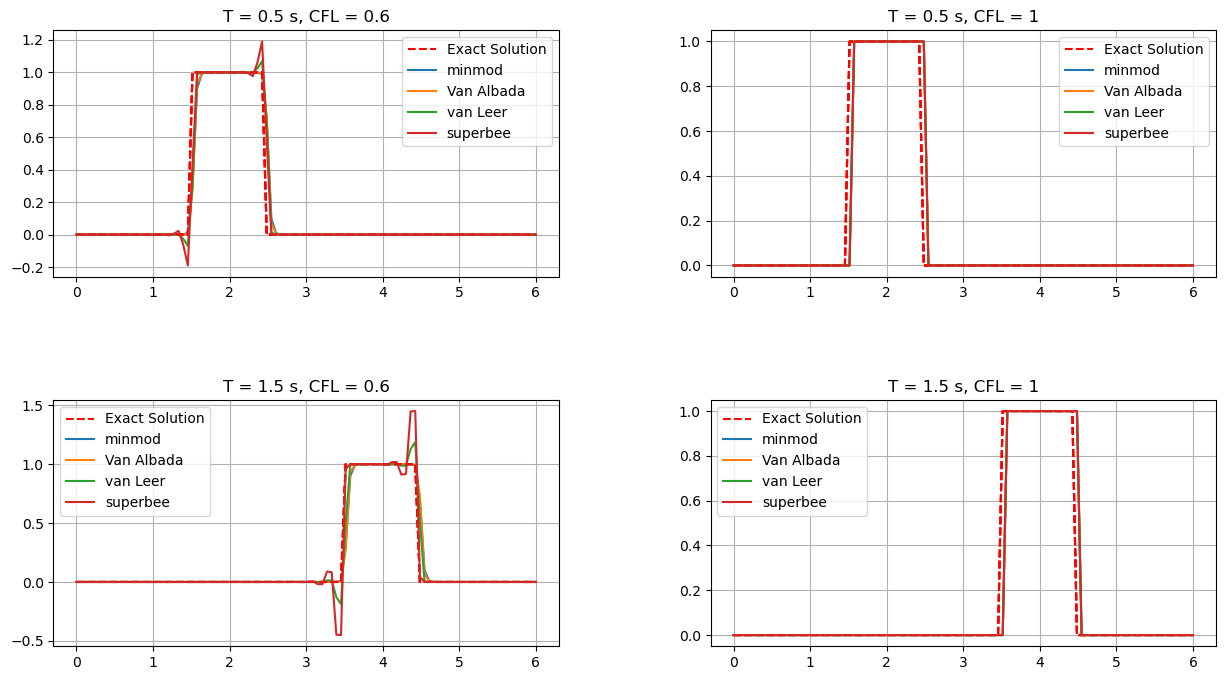

In [15]:
#Roe

import numpy as np
import matplotlib.pyplot as plt

# Longueur du domaine
a = 0
b = 6
# Nombre de noeuds
N = 100
# Le pas du maillage
dx = (b - a) / (N - 1)
c=2
# Coordonnées x des noeuds
x = np.linspace(a, b, N)

# Combinaisons de CFL et Tfinal
CFL_values = [0.6, 1]
Tfinal_values = [0.5, 1.5]

# Limiteurs de pente
limiter_functions = {
    "minmod": lambda x: max(0, min(1, x)),
    "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),
    "van Leer": lambda x: (x + abs(x)) / (1 + abs(x)),
    "superbee": lambda x: max(0, min(2 * x, 1), min(x, 2))
}

# Fonction pour la condition initiale
# Fonction pour la condition initiale
def g(x):
    x = x % b
    if 1/2 <= x <= 3/2:
        return 1
    else:
        return 0
# Fonction de mise à jour des solutions numériques et exactes
def update_solutions(CFL, Tfinal, phm):
    u = np.zeros(N)
    for i in range(N):
        u[i] = g(x[i])

    unewp = np.zeros(N)
    unewx = np.zeros(N)
    temps = 0
    dt = CFL * dx / abs(c)
    lamda = dt / dx

    while temps < Tfinal:
      

        for i in range(N):
            unewx[i] = g(x[i] - c * temps)

        r = np.zeros(N)
        for i in range(1, N - 1):
            if (u[i + 1] - u[i]) != 0:
                r[i] = (u[i] - u[i - 1]) / (u[i + 1] - u[i])
            else:
                r[i] = 0

            if (u[i] - u[i - 1]) != 0:
                r[i - 1] = (u[i - 1] - u[i - 2]) / (u[i] - u[i - 1])
            else:
                r[i - 1] = 0

            if i == N - 2:
                r[i + 1] = 0
            else:
                if (u[i + 2] - u[i + 1]) != 0:
                    r[i + 1] = (u[i + 1] - u[i]) / (u[i + 2] - u[i + 1])
                else:
                    r[i + 1] = 0

            U_L_right = u[i] + 0.5 * phm(r[i]) * (u[i + 1] - u[i])
            U_R_right = u[i + 1] - 0.5 * phm(r[i + 1]) * (u[i + 2] - u[i + 1]) if i < N - 2 else u[N - 1]
            U_L_left = u[i - 1] + 0.5 * phm(r[i - 1]) * (u[i] - u[i - 1])
            U_R_left = u[i] - 0.5 * phm(r[i]) * (u[i + 1] - u[i])
            flux_left = (c / 2) * (U_L_left + U_R_left) - 0.5 * abs(c) * (U_R_left - U_L_left)
            flux_right = (c / 2) * (U_L_right + U_R_right) - 0.5 * abs(c) * (U_R_right - U_L_right)
            unewp[i] = u[i] - lamda * (flux_right - flux_left)

        unewp[N - 1] = unewp[N - 2]
        unewp[0] = unewp[1]
        temps += dt
        u = unewp.copy()

    return x, unewx, u

# Génération des graphes
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

index = 0
for Tfinal in Tfinal_values:
    for CFL in CFL_values:
        ax = axes[index // 2, index % 2]
        for name, phm in limiter_functions.items():
            x, unewx, u = update_solutions(CFL, Tfinal, phm)
            ax.plot(x, unewx, '--r', label='Exact Solution' if name == "minmod" else "")
            ax.plot(x, u, label=f'{name}')

        ax.set_title(f"T = {Tfinal} s, CFL = {CFL}")
        ax.legend()
        ax.grid()
        index += 1
plt.savefig('Roe_limiteur_transport.png')
plt.show()

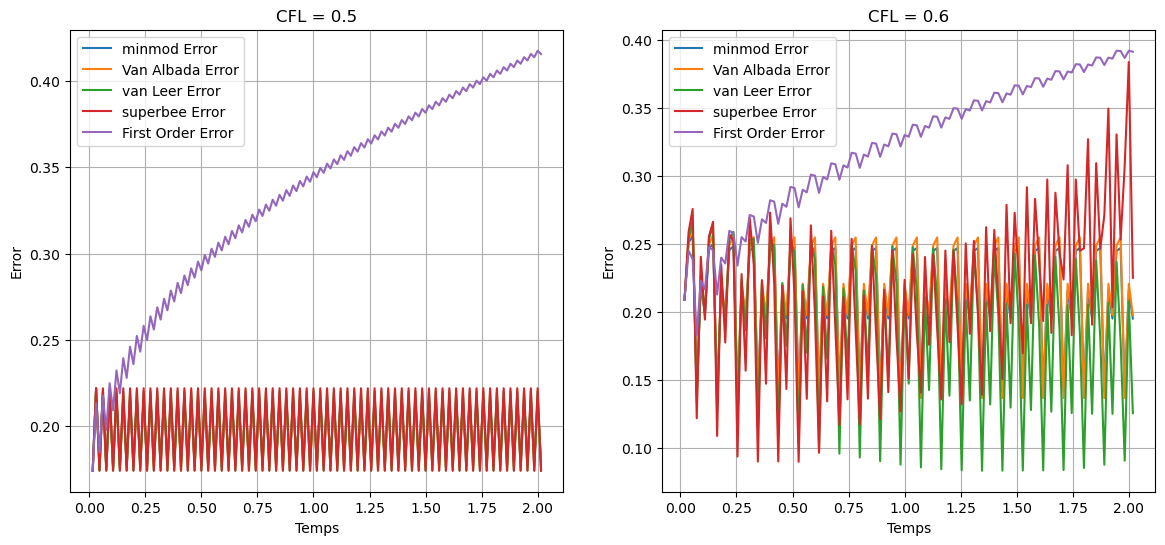

Nombre de noeuds : 99
Pas du maillage : 0.06060606060606061
Log du pas du maillage : -2.803360380906535
minmod Final Error (CFL=0.5): 0.1793 (log: -1.7188)
Van Albada Final Error (CFL=0.5): 0.1765 (log: -1.7344)
van Leer Final Error (CFL=0.5): 0.1742 (log: -1.7477)
superbee Final Error (CFL=0.5): 0.1741 (log: -1.7483)
First Order Final Error (CFL=0.5): 0.4156 (log: -0.8779)
minmod Final Error (CFL=0.6): 0.1951 (log: -1.6344)
Van Albada Final Error (CFL=0.6): 0.1976 (log: -1.6214)
van Leer Final Error (CFL=0.6): 0.1254 (log: -2.0762)
superbee Final Error (CFL=0.6): 0.2251 (log: -1.4914)
First Order Final Error (CFL=0.6): 0.3916 (log: -0.9376)


In [5]:
#roe erreur 


import numpy as np
import matplotlib.pyplot as plt

# Longueur du domaine
a = 0
b = 6
# Nombre de noeuds
N = 100
# Le pas du maillage
dx = (b - a) / (N - 1)

# Coordonnées x des noeuds
x = np.linspace(a, b, N)

# Nombre CFL (0 < CFL <= 1)
Tfinal = 2
c = 2
# Limiteurs de pente
limiter_functions = {
    "minmod": lambda x: max(0, min(1, x)),
    "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),
    "van Leer": lambda x: (x + abs(x)) / (1 + abs(x)),
    "superbee": lambda x: max(0, min(2 * x, 1), min(x, 2))
}

# Fonction pour la condition initiale
def g(x):
    x = x % b
    if 1/2 <= x <= 3/2:
        return 1
    else:
        return 0

# Fonction de mise à jour des solutions numériques et exactes
def update_solutions(CFL, Tfinal, phm=None):
    u = np.zeros(N)
    for i in range(N):
        u[i] = g(x[i])

    unewp = np.zeros(N)
    unewx = np.zeros(N)
    temps = 0
    errors = []
    time_steps = []
    dt = CFL * dx / abs(c)
    lamda = dt / dx

    while temps < Tfinal:
        for i in range(N):
            unewx[i] = g(x[i] - c * temps)

        r = np.zeros(N)
        for i in range(1, N - 1):
            if (u[i + 1] - u[i]) != 0:
                r[i] = (u[i] - u[i - 1]) / (u[i + 1] - u[i])
            else:
                r[i] = 0

            if (u[i] - u[i - 1]) != 0:
                r[i - 1] = (u[i - 1] - u[i - 2]) / (u[i] - u[i - 1])
            else:
                r[i - 1] = 0

            if i == N - 2:
                r[i + 1] = 0
            else:
                if (u[i + 2] - u[i + 1]) != 0:
                    r[i + 1] = (u[i + 1] - u[i]) / (u[i + 2] - u[i + 1])
                else:
                    r[i + 1] = 0

            if phm:
                U_L_right = u[i] + 0.5 * phm(r[i]) * (u[i + 1] - u[i])
                U_R_right = u[i + 1] - 0.5 * phm(r[i + 1]) * (u[i + 2] - u[i + 1]) if i < N - 2 else u[N - 1]
                U_L_left = u[i - 1] + 0.5 * phm(r[i - 1]) * (u[i] - u[i - 1])
                U_R_left = u[i] - 0.5 * phm(r[i]) * (u[i + 1] - u[i])

                flux_left = (c / 2) * (U_L_left + U_R_left) - 0.5 * abs(c) * (U_R_left - U_L_left)
                flux_right = (c / 2) * (U_L_right + U_R_right) - 0.5 * abs(c) * (U_R_right - U_L_right)
            else:
                flux_left = (c/2)*(u[i-1]+u[i])-1/2*abs(c)*(u[i]-u[i-1])
                flux_right=(c/2)*(u[i]+u[i+1])-1/2*abs(c)*(u[i+1]-u[i])

            unewp[i] = u[i] - lamda * (flux_right - flux_left)

        unewp[N - 1] = unewp[N - 2]
        unewp[0] = unewp[1]
        temps += dt
        u = unewp.copy()

        # Calcul de l'erreur
        error = np.sqrt(np.sum((unewx - u)**2) *dx)
        errors.append(error)
        time_steps.append(temps)

    return x, unewx, u, errors, time_steps

# Calcul et comparaison des solutions pour CFL = 0.5
CFL_05 = 0.5
errors_dict_05 = {}
time_steps_dict_05 = {}

for name, phm in limiter_functions.items():
    x, unewx, u, errors, time_steps = update_solutions(CFL_05, Tfinal, phm)
    errors_dict_05[name] = errors
    time_steps_dict_05[name] = time_steps

# Schéma du premier ordre pour CFL = 0.5
x, unewx, u, first_order_errors_05, first_order_time_steps_05 = update_solutions(CFL_05, Tfinal)
errors_dict_05["First Order"] = first_order_errors_05
time_steps_dict_05["First Order"] = first_order_time_steps_05

# Calcul et comparaison des solutions pour CFL = 0.6
CFL_06 = 0.6
errors_dict_06 = {}
time_steps_dict_06 = {}

for name, phm in limiter_functions.items():
    x, unewx, u, errors, time_steps = update_solutions(CFL_06, Tfinal, phm)
    errors_dict_06[name] = errors
    time_steps_dict_06[name] = time_steps

# Schéma du premier ordre pour CFL = 0.6
x, unewx, u, first_order_errors_06, first_order_time_steps_06 = update_solutions(CFL_06, Tfinal)
errors_dict_06["First Order"] = first_order_errors_06
time_steps_dict_06["First Order"] = first_order_time_steps_06

# Affichage graphique des erreurs en fonction du temps pour CFL = 0.5 et CFL = 0.6
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for CFL = 0.5
ax = axes[0]
for name in errors_dict_05:
    ax.plot(time_steps_dict_05[name], errors_dict_05[name], label=f'{name} Error')
ax.set_xlabel('Temps')
ax.set_ylabel('Error')
ax.set_title('CFL = 0.5')
ax.legend()
ax.grid()

# Plot for CFL = 0.6
ax = axes[1]
for name in errors_dict_06:
    ax.plot(time_steps_dict_06[name], errors_dict_06[name], label=f'{name} Error')
ax.set_xlabel('Temps')
ax.set_ylabel('Error')
ax.set_title('CFL = 0.6')
ax.legend()
ax.grid()

plt.savefig('Roe_transport_erreur.png')
plt.show()

# Affichage final des erreurs
print("Nombre de noeuds :", N - 1)
print("Pas du maillage :", dx)
print("Log du pas du maillage :", np.log(dx))
for name, errors in errors_dict_05.items():
    print(f"{name} Final Error (CFL=0.5): {errors[-1]:.4f} (log: {np.log(errors[-1]):.4f})")
for name, errors in errors_dict_06.items():
    print(f"{name} Final Error (CFL=0.6): {errors[-1]:.4f} (log: {np.log(errors[-1]):.4f})")


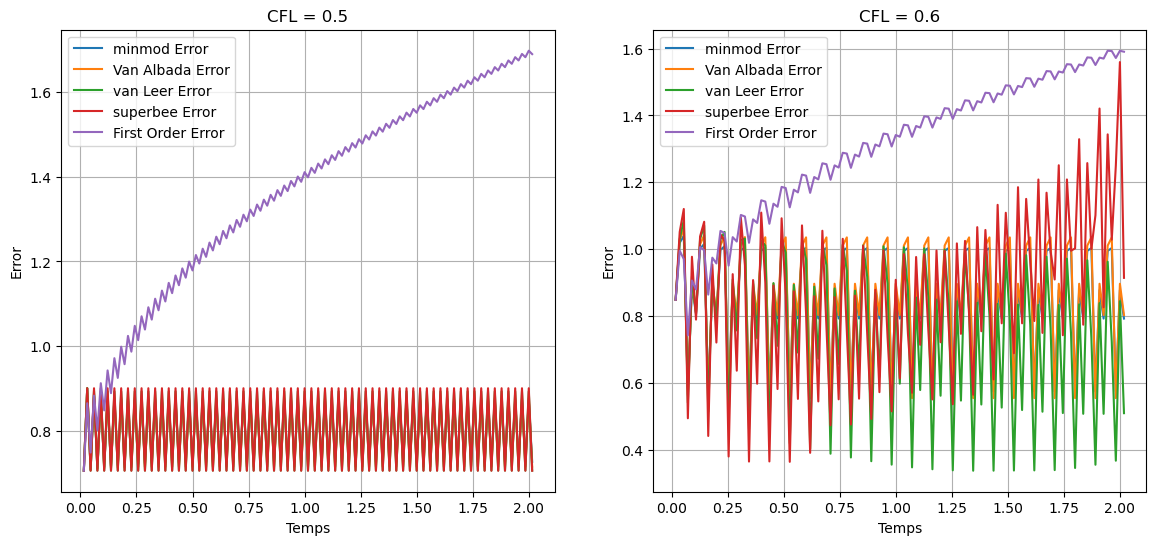

Nombre de noeuds : 99
Pas du maillage : 0.06060606060606061
Log du pas du maillage : -2.803360380906535
minmod Final Error (CFL=0.5): 0.7282 (log: -0.3171)
Van Albada Final Error (CFL=0.5): 0.7170 (log: -0.3327)
van Leer Final Error (CFL=0.5): 0.7075 (log: -0.3461)
superbee Final Error (CFL=0.5): 0.7071 (log: -0.3466)
First Order Final Error (CFL=0.5): 1.6883 (log: 0.5237)
minmod Final Error (CFL=0.6): 0.7924 (log: -0.2327)
Van Albada Final Error (CFL=0.6): 0.8027 (log: -0.2198)
van Leer Final Error (CFL=0.6): 0.5094 (log: -0.6745)
superbee Final Error (CFL=0.6): 0.9142 (log: -0.0897)
First Order Final Error (CFL=0.6): 1.5905 (log: 0.4641)


In [8]:
## hll erreur 

import numpy as np
import matplotlib.pyplot as plt

# Longueur du domaine
a = 0
b = 6
# Nombre de noeuds
N = 100
# Le pas du maillage
dx = (b - a) / (N - 1)

# Coordonnées x des noeuds
x = np.linspace(a, b, N)

# Nombre CFL (0 < CFL <= 1)
Tfinal = 2
c = 2
# Limiteurs de pente
limiter_functions = {
    "minmod": lambda x: max(0, min(1, x)),
    "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),
    "van Leer": lambda x: (x + abs(x)) / (1 + abs(x)),
    "superbee": lambda x: max(0, min(2 * x, 1), min(x, 2))
}

# Fonction pour la condition initiale
def g(x):
    x = x % b
    if 1/2 <= x <= 3/2:
        return 1
    else:
        return 0

# Fonction de mise à jour des solutions numériques et exactes
def update_solutions(CFL, Tfinal, phm=None):
    u = np.zeros(N)
    for i in range(N):
        u[i] = g(x[i])

    unewp = np.zeros(N)
    unewx = np.zeros(N)
    temps = 0
    errors = []
    time_steps = []
    dt = CFL * dx / abs(c)
    lamda = dt / dx

    while temps < Tfinal:
        for i in range(N):
            unewx[i] = g(x[i] - c * temps)

        r = np.zeros(N)
        for i in range(1, N - 1):
            if (u[i + 1] - u[i]) != 0:
                r[i] = (u[i] - u[i - 1]) / (u[i + 1] - u[i])
            else:
                r[i] = 0

            if (u[i] - u[i - 1]) != 0:
                r[i - 1] = (u[i - 1] - u[i - 2]) / (u[i] - u[i - 1])
            else:
                r[i - 1] = 0

            if i == N - 2:
                r[i + 1] = 0
            else:
                if (u[i + 2] - u[i + 1]) != 0:
                    r[i + 1] = (u[i + 1] - u[i]) / (u[i + 2] - u[i + 1])
                else:
                    r[i + 1] = 0

            if phm:
                U_L_right = u[i] + 0.5 * phm(r[i]) * (u[i + 1] - u[i])
                U_R_right = u[i + 1] - 0.5 * phm(r[i + 1]) * (u[i + 2] - u[i + 1]) if i < N - 2 else u[N - 1]
                U_L_left = u[i - 1] + 0.5 * phm(r[i - 1]) * (u[i] - u[i - 1])
                U_R_left = u[i] - 0.5 * phm(r[i]) * (u[i + 1] - u[i])

                flux_left = max(0,c)*U_L_left +min(0,c)*U_R_left
                flux_right = max(0,c)*U_L_right +min(0,c)*U_R_right
            else:
                flux_left = (c/2)*(u[i-1]+u[i])-1/2*abs(c)*(u[i]-u[i-1])
                flux_right=(c/2)*(u[i]+u[i+1])-1/2*abs(c)*(u[i+1]-u[i])

            unewp[i] = u[i] - lamda * (flux_right - flux_left)

        unewp[N - 1] = unewp[N - 2]
        unewp[0] = unewp[1]
        temps += dt
        u = unewp.copy()

        # Calcul de l'erreur
        error = np.sqrt(np.sum((unewx - u)**2) * dx)
        errors.append(error)
        time_steps.append(temps)

    return x, unewx, u, errors, time_steps

# Calcul et comparaison des solutions pour CFL = 0.5
CFL_05 = 0.5
errors_dict_05 = {}
time_steps_dict_05 = {}

for name, phm in limiter_functions.items():
    x, unewx, u, errors, time_steps = update_solutions(CFL_05, Tfinal, phm)
    errors_dict_05[name] = errors
    time_steps_dict_05[name] = time_steps

# Schéma du premier ordre pour CFL = 0.5
x, unewx, u, first_order_errors_05, first_order_time_steps_05 = update_solutions(CFL_05, Tfinal)
errors_dict_05["First Order"] = first_order_errors_05
time_steps_dict_05["First Order"] = first_order_time_steps_05

# Calcul et comparaison des solutions pour CFL = 0.6
CFL_06 = 0.6
errors_dict_06 = {}
time_steps_dict_06 = {}

for name, phm in limiter_functions.items():
    x, unewx, u, errors, time_steps = update_solutions(CFL_06, Tfinal, phm)
    errors_dict_06[name] = errors
    time_steps_dict_06[name] = time_steps

# Schéma du premier ordre pour CFL = 0.6
x, unewx, u, first_order_errors_06, first_order_time_steps_06 = update_solutions(CFL_06, Tfinal)
errors_dict_06["First Order"] = first_order_errors_06
time_steps_dict_06["First Order"] = first_order_time_steps_06

# Affichage graphique des erreurs en fonction du temps pour CFL = 0.5 et CFL = 0.6
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for CFL = 0.5
ax = axes[0]
for name in errors_dict_05:
    ax.plot(time_steps_dict_05[name], errors_dict_05[name], label=f'{name} Error')
ax.set_xlabel('Temps')
ax.set_ylabel('Error')
ax.set_title('CFL = 0.5')
ax.legend()
ax.grid()

# Plot for CFL = 0.6
ax = axes[1]
for name in errors_dict_06:
    ax.plot(time_steps_dict_06[name], errors_dict_06[name], label=f'{name} Error')
ax.set_xlabel('Temps')
ax.set_ylabel('Error')
ax.set_title('CFL = 0.6')
ax.legend()
ax.grid()

plt.savefig('hll_error_transport.png')
plt.show()

# Affichage final des erreurs
print("Nombre de noeuds :", N - 1)
print("Pas du maillage :", dx)
print("Log du pas du maillage :", np.log(dx))
for name, errors in errors_dict_05.items():
    print(f"{name} Final Error (CFL=0.5): {errors[-1]:.4f} (log: {np.log(errors[-1]):.4f})")
for name, errors in errors_dict_06.items():
    print(f"{name} Final Error (CFL=0.6): {errors[-1]:.4f} (log: {np.log(errors[-1]):.4f})")
